In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

output_path = '/home/ubuntu/fakers/model_output_ela/resnext101_64/'

import os
os.chdir('/home/ubuntu/fastai/old')
# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *
from pathlib import *
import pandas as pd
import numpy as np

#checking wheteher cuda and cudnn are available. Cuda is necessary & Cudnn is optional, it makes computation faster
torch.cuda.is_available()

torch.backends.cudnn.enabled

#using  device 0-gpu
torch.cuda.set_device(0)
torch.cuda.current_device()




0

In [3]:
input_path = '/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/'
labels_model = pd.read_csv(input_path+'train_label.csv')

labels_model.head()

,image_id,class
0,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real
1,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real
2,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real
3,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real
4,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real


In [20]:
labels_model['image_id2'][0]

'/home/FRACTAL/shaheen.perveen/stage3/fakers/stage-3/stage3_image_data/train_ela/real/new_real20190208090259_b94639e64f3efbfb92af036355aed6fc.jpg'

In [9]:
# label_image_real = labels_model[labels_model['class']=='real']['image_id']
# label_image_real = [x.split("/")[-1].split(".")[0] for x in label_image_real]
# # print(label_image_real[:5])
# # print(len(label_image_real))
# # label_image_id = [in]
# label_image_fake = labels_model[labels_model['class']=='fake']['image_id']
# label_image_fake = [x.split("/")[-1].split(".")[0] for x in label_image_fake]

In [12]:
labels_model['image_id1'] = labels_model['image_id']

In [13]:
labels_model['image_id1'] = labels_model['image_id1'].apply(lambda x: x.replace("/train/real/", "/train_ela/real/"))

In [17]:
labels_model['image_id2'] = labels_model['image_id1'].apply(lambda x: x.replace("/train/fake/", "/train_ela/fake_all/"))

In [21]:
labels_model['image_id_final'] = labels_model['image_id2'].apply(lambda x: x.replace("/home/FRACTAL/shaheen.perveen/stage3/fakers/stage-3/stage3_image_data/", "/home/ubuntu/fakers/stage-3/stage3_image_data/"))

In [22]:
labels_model.head()

,image_id,class,image_id1,image_id2,image_id_final
0,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/ubuntu/fakers/stage-3/stage3_image_data/...
1,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/ubuntu/fakers/stage-3/stage3_image_data/...
2,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/ubuntu/fakers/stage-3/stage3_image_data/...
3,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/ubuntu/fakers/stage-3/stage3_image_data/...
4,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,real,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/FRACTAL/shaheen.perveen/stage3/fakers/st...,/home/ubuntu/fakers/stage-3/stage3_image_data/...


In [23]:
labels_model.shape

(32260, 5)

In [25]:
labels_model1 = labels_model.copy()

In [26]:
labels_model = labels_model[['image_id_final', 'class']]

In [45]:
labels_model['image_id_final'][0]

'/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/real/new_real20190208090259_b94639e64f3efbfb92af036355aed6fc_ela.jpg'

In [48]:
labels_model.head()

,image_id_final,class
0,/home/ubuntu/fakers/stage-3/stage3_image_data/...,real
1,/home/ubuntu/fakers/stage-3/stage3_image_data/...,real
2,/home/ubuntu/fakers/stage-3/stage3_image_data/...,real
3,/home/ubuntu/fakers/stage-3/stage3_image_data/...,real
4,/home/ubuntu/fakers/stage-3/stage3_image_data/...,real


In [43]:
labels_model['image_id_final'] = labels_model['image_id_final'].apply(lambda x: x.replace('.jpg', '_ela.jpg'))

In [46]:
labels_model.to_csv(input_path+"label_csv.csv",index=False)

In [47]:
labels = labels_model[['class']]
print(labels.head(1))

labels['class'] = np.where(labels['class'] == 'real',1,0)
print(labels.head(1))

print(labels.describe())

  class
0  real
   class
0      1
              class
count  32260.000000
mean       0.259547
std        0.438393
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


/opt/anaconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [49]:

def get_data(f_model,sz,bs,val_idxs,aug_tfms,root_path,train_folder,label_csv,test_folder,skip_header,augmentation_required):
    if (augmentation_required):
        tfms = tfms_from_model(f_model, sz,aug_tfms=aug_tfms,max_zoom=1.1)
    else:
        tfms =  tfms_from_model(f_model, sz)
    
    label_csv.to_csv(str(root_path)+'temp_label_file.csv',index=False)
    
    return ImageClassifierData.from_csv(root_path, train_folder,str(root_path)+'temp_label_file.csv',bs=bs,tfms=tfms,
                     val_idxs=val_idxs,test_name=test_folder,skip_header=skip_header)

def exp_name(output_path,freeze,model_name,lrn,sz):
    return output_path+freeze+'_'+'_'+model_name+'_lr'+str(lrn)+'_sz'+str(sz)

label_csv = pd.read_csv(input_path+"label_csv.csv")
#a root path of the data (used for storing trained models, precomputed values, etc)
root_path=('/home/ubuntu/fakers/temp_root/')
#a name of the folder in which training images are contained.
train_folder = ('')
#a name of the folder which contains test images.
test_folder= ('/home/ubuntu/fakers/stage-3/stage3_image_data/test/test')

#for generating the validation indexes
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=1729)
labels_splits = labels.copy()
X= labels['class'].astype(int)
y=labels['class'].astype(int)

for train_index, test_index in sss.split(X, y):
    trn_indx = train_index
    val_idxs = test_index

f_model=resnext101_64
sz=224
aug_tfms=transforms_side_on
max_zoom=1.1
bs=4
#use this if we dont need augmentation
augmentation_required = True

model_name=str(f_model).split(' ')[1]

In [ ]:
not_read = []
for fname in label_csv["image_id_final"]:
    try:
        im = Image.open(fname)
    except:
        not_read.append(fname)
#         continue

In [ ]:
len(not_read)
not_read

In [ ]:
label_csv['image_id_final'] = label_csv['image_id_final'].apply(lambda x: x.replace("/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/fake_all/new_fake20190208093216_new_fake20190208091910_f5de5c6f3d7299f33ac2a855afe0bd3d_ela.jpg", "/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/fake_all/new_fake20190208094137_new_fake20190208091649_0e5a22a5367e4b7ea8c8ec3e06fb7010_ela.jpg"))
label_csv['image_id_final'] = label_csv['image_id_final'].apply(lambda x: x.replace("/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/fake_all/new_fake20190208093603_new_fake20190208091454_7271aec85d38ba512829278fa3d97453_ela.jpg", "/home/ubuntu/fakers/stage-3/stage3_image_data/train_ela/fake_all/new_fake20190208093924_new_fake20190208091345_f30028aadb49060106ccd7693853ea76_ela.jpg"))

In [91]:
label_csv.to_csv(input_path+"label_csv.csv", index=False)

In [64]:
#making data object
data = get_data(f_model,sz,bs,val_idxs,aug_tfms,root_path,train_folder,label_csv,test_folder,skip_header=True,augmentation_required=augmentation_required)

In [65]:
learn = ConvLearner.pretrained(f_model, data,precompute=False)

 64%|██████▎   | 4102/6452 [11:37<06:10,  6.35it/s, loss=2.11]  

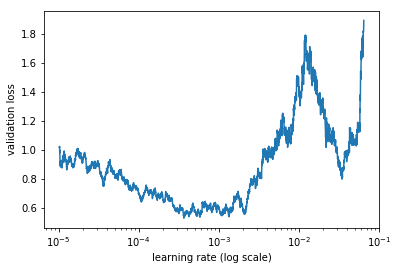

In [66]:
lrf=learn.lr_find()

learn.sched.plot()

In [69]:
lrn=8e-5

In [70]:
learn.fit(lrn, 3, cycle_len=1, cycle_mult=2)


learn.save(exp_name(output_path,'frz',model_name,lrn,sz))

#loading the previous saved model and unfreezing the network for more training
learn.load(exp_name(output_path,'frz',model_name,lrn,sz))
learn.unfreeze()
learn.bn_freeze(True)

lr=np.array([lrn/100,lrn/10,lrn])

learn.fit(lr, 2, cycle_len=1,cycle_mult=2)
learn.save(exp_name(output_path,'unfrz',model_name,lrn,sz))


epoch      trn_loss   val_loss   accuracy                      
    0      0.549002   0.505442   0.75713   
    1      0.547897   0.483173   0.769064                      
    2      0.498989   0.486485   0.765344                       
    3      0.536464   0.476862   0.772784                      
    4      0.531451   0.475833   0.766584                      
    5      0.500679   0.472578   0.769839                      
    6      0.52122    0.472363   0.770459                       


epoch      trn_loss   val_loss   accuracy                        
    0      0.465633   0.434891   0.794482  
    1      0.441529   0.420761   0.802852                        
    2      0.439402   0.420152   0.807812                        


In [95]:
from sklearn.metrics import f1_score
import warnings
def f1(log_preds, targs, start=0.1, end=0.8, step=0.1):
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        pos_predss = torch.exp(log_preds) 
        return max([f1_score(targs, torch.max(pos_predss > th, dim=1)[1], average='weighted')
                    for th in np.arange(start,end,step)])

In [ ]:
#
sz=224
learn.load(exp_name(output_path,'unfrz',model_name,lrn,sz))
learn.freeze()

sz=400
#making data object
data = get_data(f_model,sz,bs,val_idxs,aug_tfms,root_path,train_folder,label_csv,test_folder,skip_header=True,augmentation_required=augmentation_required)
learn.set_data(data)



lrn=8e-5

learn.fit(lrn, 3, cycle_len=1, cycle_mult=2, metrics=[accuracy, f1])

learn.save(exp_name(output_path,'frz',model_name,lrn,sz))

#loading the previous saved model and unfreezing the network for more training
learn.load(exp_name(output_path,'frz',model_name,lrn,sz))
learn.unfreeze()
learn.bn_freeze(True)

lr=np.array([lrn/100,lrn/10,lrn])

learn.fit(lr, 2, cycle_len=1,cycle_mult=2, metrics=[accuracy, f1])
learn.save(exp_name(output_path,'unfrz',model_name,lrn,sz))


 76%|███████▋  | 4922/6452 [33:55<09:51,  2.59it/s, loss=0.408]  

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



    1      0.392206   0.421841   0.805952   0.958398             
    2      0.432714   0.422218   0.808741   0.96455              
    3      0.435152   0.421885   0.804247   0.967803             
    4      0.478953   0.420514   0.807037   0.969716             
    5      0.515091   0.417612   0.808741   0.966339             
    6      0.466888   0.417645   0.810446   0.966156             


    1      0.389248   0.407314   0.814941   0.960027               
 89%|████████▉ | 5751/6452 [2:55:09<32:25,  2.78s/it, loss=0.432]  

In [ ]:
#
learn.load(exp_name(output_path,'unfrz',model_name,lrn,sz))
learn.freeze()

sz=512
#making data object
data = get_data(f_model,sz,bs,val_idxs,aug_tfms,root_path,train_folder,label_csv,test_folder,skip_header=True,augmentation_required=augmentation_required)
learn.set_data(data)



lrn=8e-5

learn.fit(lrn, 3, cycle_len=1, cycle_mult=2)

learn.save(exp_name(output_path,'frz',model_name,lrn,sz))

#loading the previous saved model and unfreezing the network for more training
learn.load(exp_name(output_path,'frz',model_name,lrn,sz))
learn.unfreeze()
learn.bn_freeze(True)

lr=np.array([lrn/100,lrn/10,lrn])

learn.fit(lr, 2, cycle_len=1,cycle_mult=2)
learn.save(exp_name(output_path,'unfrz',model_name,lrn,sz))